In [647]:
from os import listdir
from os.path import join, isfile
from typing import List

In [648]:
def get_data_from_file(path: str):
    with open(path, "r") as f:
        data: List[List[int]] = []
        lines = f.readlines()
        for line in lines:
            data.append([int(c) for c in line.split()])
        return data


def get_paths_of_dir(path: str, extension: str):
    return [join(path, f) for f in listdir(path)
            if isfile(join(path, f)) and f.endswith(extension)]

In [649]:
inDirPath = "../../Input/"
inPaths = get_paths_of_dir(inDirPath, extension=".in")

In [650]:
n_problem = int(input("Elige el problema (1-5): "))

inDirFiles = listdir(inDirPath)
file_name = inDirFiles[n_problem - 1]

path = inPaths[n_problem - 1]
prob = get_data_from_file(path)

In [651]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

## Variable meanings.

* R = Number of rows.
* C = Number of columns.
* F = Number of vehicles.
* N = Pre-booked rides.
* B = Per-ride bonus for starting the ride on time.
* T = Simulation steps = distance between start and end.

In [652]:
# Problem data.
_, _, F, N, B, T = prob[0]

# Rides.
rides = prob[1:]

Bonus:
* Earn points proportional to distance of ride.
* Bonus if started on time. 

In [653]:
toolbox = base.Toolbox()

In [654]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

In [655]:
toolbox.register("attribute", random.randint, 0, F - 1)
toolbox.register("individual", tools.initRepeat,
                 creator.Individual, toolbox.attribute, n=N)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [656]:
def sort_rides(vehicle_rides):
    def sort_ride(ride):
        a, b, x, y, s, f = ride[1]
        origin = [a, b]
        destiny = [x, y]
        distance = dis(origin, destiny)

        return s + f - distance
    
    return sorted(vehicle_rides, key=lambda ride: sort_ride(ride))

def get_rides_from_ind(individual):
    vehicles_rides = np.full(F, None)
    
    for i, vehicle in enumerate(individual):
        v_r = vehicles_rides[vehicle]
        
        if v_r is None:
            v_r = []
            
        ride = rides[i]
        v_r.append([i, ride])
        
        vehicles_rides[vehicle] = v_r

    return vehicles_rides

def dis(a, b): return np.abs(a[0] - b[0]) + np.abs(a[1]-b[1])


In [657]:
def calc_fitness(car_rides):
    fitness = 0
    step = 0
    pos = [0, 0]
    
    # Sort car_rides given earliest time.
    car_rides = sort_rides(car_rides)

    for _, ride in car_rides:
        a, b, x, y, s, f = ride
        origin = [a, b]
        destiny = [x, y]
        earliest_start = s
        latest_finish = f
        
        # 1.- Go to origin.
        step += dis(pos, origin)
        
        # 2.- If arrived before the earliest time. Wait and earn bonus.
        if step <= earliest_start:
          fitness += B
          step = earliest_start
          
        # 3.- Go to destiny.
        dis_ori_des = dis(origin, destiny)
        step += dis_ori_des
        
        #4.- If reached destiny before latest finish. Earn points.
        if step <= latest_finish:
          fitness += dis_ori_des
          
        # 5.- Update position.
        pos = destiny
                  
        # 6.- Check if reached max distance with one vehicle.
        if step > T:
          break
    
    return fitness
        
def eval_ind(ind):
    all_rides = get_rides_from_ind(ind)

    fitness = 0

    for car_rides in all_rides:
        if car_rides is not None:
            fitness += calc_fitness(car_rides)

    return fitness,


In [658]:
NIND = 150

pop = toolbox.population(n=NIND)
print(f"Population: {pop}")

Population: [[0, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 0], [1, 0, 0], [1, 1, 1], [1, 0, 0], [1, 0, 1], [0, 1, 0], [0, 1, 0], [1, 0, 1], [1, 1, 1], [0, 0, 0], [1, 1, 0], [0, 1, 0], [0, 1, 0], [0, 0, 0], [1, 1, 0], [0, 0, 1], [1, 1, 1], [1, 1, 0], [1, 1, 0], [0, 1, 1], [1, 1, 1], [0, 0, 0], [1, 0, 0], [1, 0, 1], [0, 0, 0], [1, 1, 1], [0, 0, 0], [0, 1, 1], [0, 1, 0], [1, 1, 0], [0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 0, 1], [0, 1, 0], [1, 0, 0], [1, 1, 0], [0, 0, 1], [1, 0, 1], [1, 0, 1], [0, 1, 1], [1, 0, 0], [1, 0, 0], [1, 1, 0], [0, 0, 1], [1, 1, 0], [1, 1, 0], [0, 0, 0], [0, 0, 1], [1, 1, 0], [1, 1, 0], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 0, 1], [0, 0, 0], [1, 1, 1], [0, 1, 1], [0, 1, 1], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 1, 1], [1, 1, 0], [0, 0, 1], [1, 0, 0], [0, 0, 1], [1, 0, 0], [1, 1, 1], [0, 0, 1], [1, 1, 0], [0, 0, 0], [0, 1, 1], [0, 0, 0], [1, 1, 1], [0, 1, 0], [1, 0, 1], [0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 1], [0, 0, 1], [1, 1, 1], [0, 1, 0], [1, 0, 1

In [659]:
ind = toolbox.individual()

print("Individuo ANTES de evaluar")
print(ind)
print(ind.fitness.valid)
print("\n")

ind.fitness.values = eval_ind(ind)

print("Individuo TRAS evaluar")
print(ind)
print(ind.fitness.valid)
print(ind.fitness)

Individuo ANTES de evaluar
[0, 0, 0]
False


Individuo TRAS evaluar
[0, 0, 0]
True
(8.0,)


In [660]:
TOURNSIZE, INDPB = 3, 0.05

toolbox.register("select", tools.selTournament, tournsize=TOURNSIZE)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=INDPB)
toolbox.register("evaluate", eval_ind)

In [661]:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

In [662]:
CXPB, MUTPB, NGEN = 1.0, 0.075, 100

pop, logbook = algorithms.eaSimple(
    pop, toolbox, CXPB, MUTPB, NGEN, stats, verbose=False)

best_sol = tools.selBest(pop, 1)[0]

print(f"El resultado de la evolución es:")
print(logbook)
print(f"La mejor solucion encontrada es: {best_sol}")


El resultado de la evolución es:
gen	nevals	avg 	std     	min	max
0  	200   	8.96	0.9992  	8  	10 
1  	200   	9.08	0.996795	8  	10 
2  	200   	8.96	0.9992  	8  	10 
3  	200   	9.33	0.943981	8  	10 
4  	200   	9.57	0.821645	8  	10 
5  	200   	9.84	0.542586	8  	10 
6  	200   	9.97	0.243105	8  	10 
7  	200   	9.98	0.198997	8  	10 
8  	200   	9.98	0.198997	8  	10 
9  	200   	9.98	0.198997	8  	10 
10 	200   	10  	0       	10 	10 
11 	200   	9.98	0.198997	8  	10 
12 	200   	9.98	0.198997	8  	10 
13 	200   	9.99	0.141067	8  	10 
14 	200   	9.98	0.198997	8  	10 
15 	200   	9.98	0.198997	8  	10 
16 	200   	9.97	0.243105	8  	10 
17 	200   	9.99	0.141067	8  	10 
18 	200   	10  	0       	10 	10 
19 	200   	9.97	0.243105	8  	10 
20 	200   	9.99	0.141067	8  	10 
21 	200   	9.99	0.141067	8  	10 
22 	200   	9.95	0.31225 	8  	10 
23 	200   	9.99	0.141067	8  	10 
24 	200   	9.99	0.141067	8  	10 
25 	200   	9.98	0.198997	8  	10 
26 	200   	9.99	0.141067	8  	10 
27 	200   	9.97	0.243105	8  	10 
28 	200   

[]

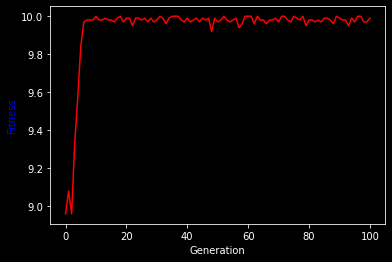

In [663]:
gen = logbook.select("gen")
avgs = logbook.select("avg")

fig = plt.figure()

ax = plt.gca()
line = ax.plot(gen, avgs, "r-", label="Average Fitness")
ax.set_xlabel("Generation")
ax.set_ylabel("Fitness", color="b")

plt.plot()

In [664]:
outDirPath = "../../Output/"
outFilePath = outDirPath + file_name.strip(".in") + ".out"

vehicles_rides = get_rides_from_ind(best_sol)

with open(outFilePath, "w") as f:
    for v_r in vehicles_rides:
      if v_r is None:
        f.write(str(0))
      else:
        v_r = sort_rides(v_r)    
        f.write(str(len(v_r)))
        f.write(" ")
        f.write(" ".join(str(pos) for pos, _ in v_r))
      
      f.write("\n")